<a href="https://colab.research.google.com/github/ScriptsRemote/SCRIPTSREMOTE/blob/main/00_HydroBr_esta%C3%A7%C3%B5es_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Utilizando o pacote HydroBr

### Vamos baixar dados de uma estação da ANA utilizando Python?

In [ ]:
!pip install hydrobr geopandas descartes geobr -q

In [2]:
###Importando as Bibliotecas
import hydrobr
import pandas as pd
import geobr
import geopandas as gpd


from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



<Axes: >

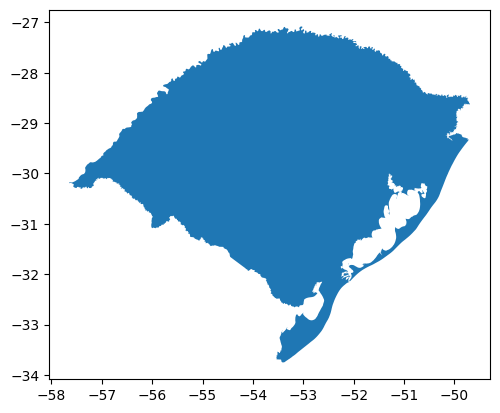

In [3]:
##Selecionando um shp
gdf = geobr.read_state(code_state="RS", year=2020)
gdf.plot()

In [4]:
###Abrindo dados das estações - Nesta caso vamos trabalhar com dados de precipitação
lista_estacaoes = hydrobr.get_data.ANA.list_prec_stations()
lista_estacaoes.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


In [8]:
##Filtrando por Estado
lista_estacaoes_state= lista_estacaoes[lista_estacaoes.State=='RIO GRANDE DO SUL']
lista_estacaoes_state.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
11259,MARCELINO RAMOS,02751005,2,73,MARCELINO RAMOS,RIO GRANDE DO SUL,ELETROSUL,-27.4611,-51.9136,1935/09/01,1992/10/31,58,37.9,23,60.3
11260,PAIM FILHO,02751006,2,72,PAIM FILHO,RIO GRANDE DO SUL,ANA,-27.7125,-51.7378,1957/10/17,2019/10/31,63,1.4,57,9.5
11261,SANANDUVA,02751007,2,72,SANANDUVA,RIO GRANDE DO SUL,ANA,-27.9828,-51.7836,1957/07/03,2019/10/31,63,1.5,55,12.7
11262,PCH FORQUILHA BARRAMENTO,02751008,2,72,MAXIMILIANO DE ALME,RIO GRANDE DO SUL,CEEE,-27.6589,-51.7483,1949/06/01,1981/12/31,33,0.0,32,3.0
11267,BARRACÃO,02751015,2,70,BARRACÃO,RIO GRANDE DO SUL,ANA,-27.6786,-51.4547,1977/12/01,2019/10/31,43,1.8,27,37.2


In [ ]:
#Obtendo o código das primeiras cinco estações como uma lista
codigo_estacao = lista_estacaoes_state.Code.to_list()
codigo_estacao

In [10]:
#Extraindo dados das estações selecionadas
data_stations = hydrobr.get_data.ANA.prec_data(codigo_estacao)

100%|██████████| 540/540 [19:52<00:00,  2.21s/it]


In [11]:
##Obtendo informações sobre as estações
data_stations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40602 entries, 1912-01-01 to 2023-02-28
Freq: D
Columns: 540 entries, 02751005 to 03353009
dtypes: float64(540)
memory usage: 167.6 MB


In [12]:
###Veridicando a distribuição dos dados no tempo
###O diagrama de Gantt
gantt_fig = hydrobr.Plot.gantt(data_stations)
gantt_fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Year',
    yaxis_title = 'Station Code',
    font=dict(family="Courier New, monospace", size=12))

#Para plotar e salvar o gráfico de Gantt como html
plot(gantt_fig,filename='gantt' + '.html')

Station 02854020 has no months with significant data
Station 02951031 has no months with significant data
Station 02954024 has no months with significant data
Station 02957003 has no months with significant data
Station 03054017 has no months with significant data
Station 03150002 has no months with significant data
Station 03154004 has no months with significant data


'gantt.html'

In [15]:
##Analisando o DF
data_stations_index = data_stations.reset_index()
data_stations_index

,index,02751005,02751006,02751007,02751008,02751015,02751017,02751018,02751025,02751030,...,03253014,03253016,03253020,03352001,03353001,03353002,03353004,03353006,03353007,03353009
0,1912-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1912-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1912-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1912-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1912-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40597,2023-02-24,NaN,0.0,18.9,NaN,0.5,18.2,15.5,21.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40598,2023-02-25,NaN,2.5,5.6,NaN,0.0,2.1,12.2,1.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40599,2023-02-26,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40600,2023-02-27,NaN,0.0,0.0,NaN,0.0,0.5,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data_stations_index.to_csv('data_stations_index.csv')

In [16]:
##Preparando a base de dados para realizar o gráfico
data_stations_melt = pd.melt(data_stations_index, id_vars='index',
                        value_vars=codigo_estacao,   var_name="Estacoes", value_name="Precipitacao")

data_stations_melt

,index,Estacoes,Precipitacao
0,1912-01-01,02751005,NaN
1,1912-01-02,02751005,NaN
2,1912-01-03,02751005,NaN
3,1912-01-04,02751005,NaN
4,1912-01-05,02751005,NaN
...,...,...,...
21925075,2023-02-24,03353009,NaN
21925076,2023-02-25,03353009,NaN
21925077,2023-02-26,03353009,NaN
21925078,2023-02-27,03353009,NaN


In [18]:
data_stations_melt.to_csv('data_stations_melt.csv')

In [ ]:
##Plotando os dados como gráficos e observando as séries temporais
##Gráfico série temporal
fig, ax = plt.subplots(1,1,figsize=(15, 10), dpi= 100)
from matplotlib import rc
rc('mathtext', default='regular')
plt.xticks(fontsize=10, rotation=85)
plt.yticks(fontsize=10)

sns.lineplot(x="index", y="Precipitacao", hue="Estacoes", data=data_stations_melt)\
            .set(title='Precipitação estações pluviométricas de Porto Alegre mm/dia-¹')

plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação mm/dia', fontsize=12)

Text(0, 0.5, 'Precipitação mm/dia')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



##### Referencias
* ###### Adpatado de Carvalho (2020) - https://wallissoncarvalho.github.io/HydroBr/